### Module Importation

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import statistics
%matplotlib inline

### Load the ECG Image

#### Load the ECG

In [2]:
filename = 'V6'

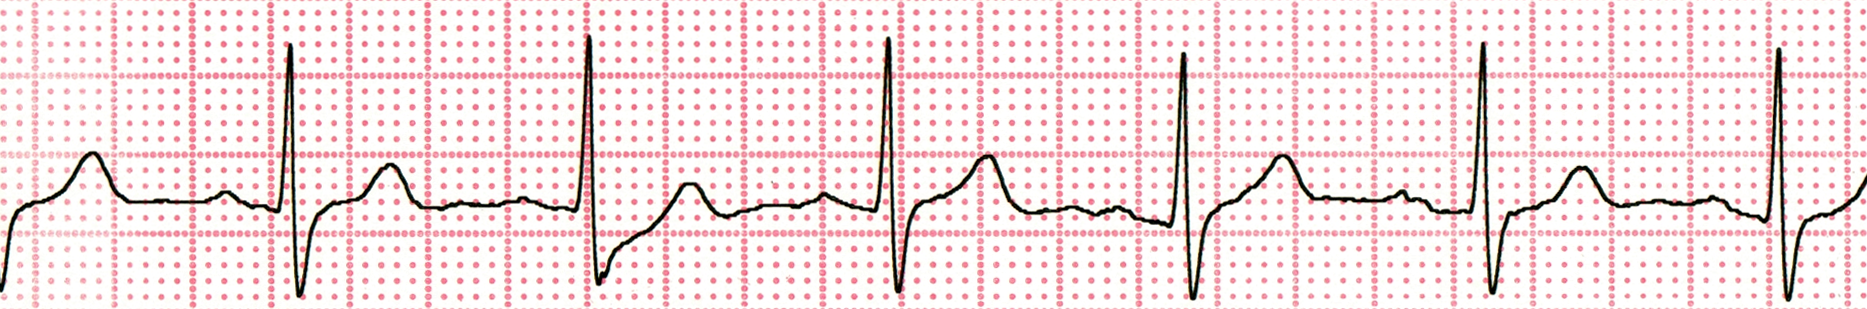

In [3]:
ecg = Image.open('ECG_Input/Lead_' + filename + '.bmp')
ecg

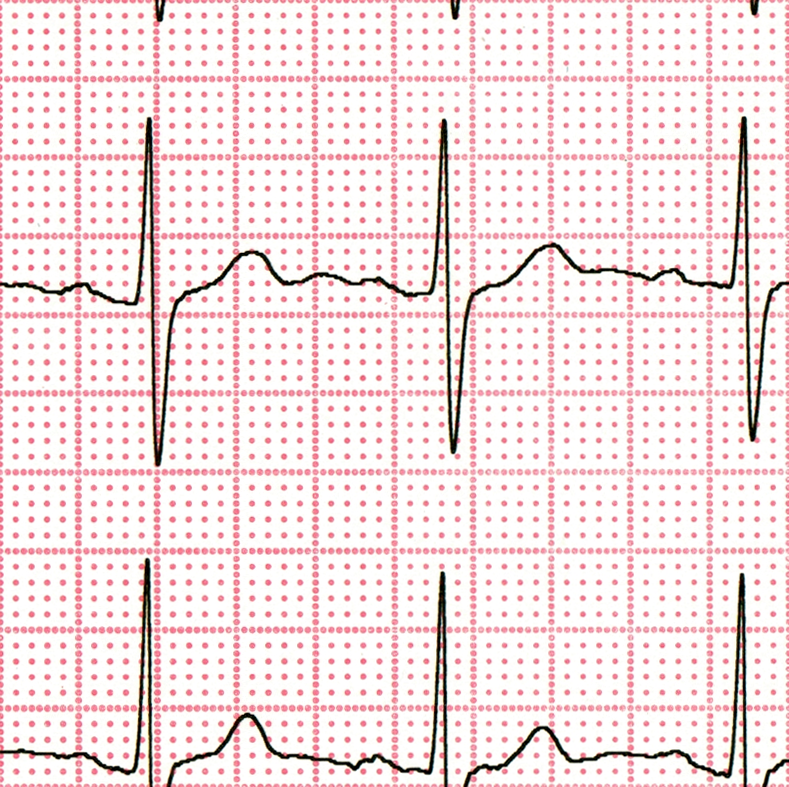

In [4]:
scale = Image.open('ECG_Input/Scale.bmp')
scale

### Calculate the Dimensions

In [5]:
x = ecg.size[0]
y = ecg.size[1]

print(x)
print(y)

1867
309


### Calculate the Scale

In [6]:
x_scale = scale.size[0]
y_scale = scale.size[1]

print(x_scale)
print(y_scale)

789
787


In [7]:
PixelPerSmallGrid = (x_scale + y_scale) * 0.5 / 50
print(PixelPerSmallGrid)

15.76


In [8]:
SmallGridPerPixel = 1 / PixelPerSmallGrid

In [9]:
timeUnit = []
for i in range(x):
    timeUnit.append(i * SmallGridPerPixel * 0.04)

### Extract All the Pixels

In [10]:
matrix = []
points = []

for i in range(x):
    matrix.append([])
    for j in range(y):
        matrix[i].append(ecg.getpixel((i,j)))       

### Extract Black Points

In [11]:
referenceLine_pos = y
gain = SmallGridPerPixel * 0.1
absMax = 0
leadName_original = []
points_vertical = []
theOne = 0

for xAxis in range(x):
    for yAxis in range(y):
        currentPoint = matrix[xAxis][yAxis]
        # Pickup Blue points
        if currentPoint[0] < 100 and currentPoint[1] < 100 and currentPoint[2] < 100:
            points_vertical.append(yAxis)
   
    
    # Choose the largest amplitude
    for item in points_vertical:
        
        if math.fabs(item-referenceLine_pos) > absMax:
            absMax = math.fabs(item-referenceLine_pos)
            theOne = item 
    leadName_original.append((200-theOne)*gain)
    
    absMax = 0  
    theOne = 0
    points_vertical = []

In [12]:
leadName = []
zeroPotential = statistics.median(leadName_original)
for item in leadName_original:
    leadName.append(item-zeroPotential)

In [13]:
leadName

[-0.5203045685279187,
 -0.5139593908629441,
 -0.4885786802030457,
 -0.45050761421319796,
 -0.41878172588832485,
 -0.34263959390862947,
 -0.30456852791878175,
 -0.24111675126903553,
 -0.20304568527918782,
 -0.1649746192893401,
 -0.13959390862944163,
 -0.12055837563451775,
 -0.10152284263959391,
 -0.09517766497461928,
 -0.07614213197969542,
 -0.06345177664974619,
 -0.05710659898477157,
 -0.050761421319796954,
 -0.050761421319796954,
 -0.044416243654822336,
 -0.03807106598984772,
 -0.03807106598984772,
 -0.0317258883248731,
 -0.025380710659898477,
 -0.01903553299492386,
 -0.01269035532994924,
 -0.01269035532994924,
 -0.01269035532994924,
 -0.01269035532994924,
 -0.01269035532994924,
 -0.006345177664974619,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.006345177664974619,
 0.012690355329949238,
 0.012690355329949238,
 0.012690355329949238,
 0.012690355329949238,
 0.01903553299492386,
 0.025380710659898477,
 0.025380710659898477,
 0.025380710659898477,
 0.025380710659898477

In [14]:
matrix[0][0]

(254, 246, 242)

In [15]:
len(leadName)

1867

### Construct Numpy Array and File

In [16]:
leadName_array = np.array([timeUnit, leadName])

In [17]:
np.save('ECG_Output/' + filename + '_array', leadName_array)

In [18]:
leadName_load = np.load('ECG_Output/' + filename + '_array.npy')

In [19]:
leadName_load.shape

(2, 1867)

### Output the ECG data globally

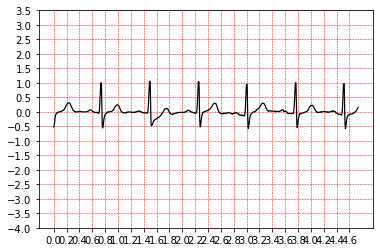

In [20]:
fig = plt.figure()
s = fig.add_subplot(111)

s.plot(timeUnit, leadName, linewidth=1.2, color='black')

s.set_xticks(np.arange(0, timeUnit[-1], 0.2))
s.set_yticks(np.arange(-4, 4, 0.5))
plt.grid(True, color='r', linestyle='--', linewidth=0.5)

In [21]:
fig.savefig('ECG_Output/ECG_' + filename + '_output.png', dpi=600)

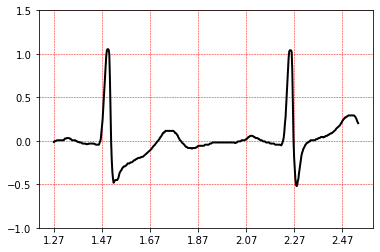

In [22]:
start = 500
end = 1000

fig = plt.figure()
s = fig.add_subplot(111)
s.plot(timeUnit[start:end], leadName[start:end], linewidth=2, color='black')

s.set_xticks(np.arange(timeUnit[start], timeUnit[end], 0.2))
s.set_yticks(np.arange(-1, 2, 0.5))
plt.grid(True, color='r', linestyle='--', linewidth=0.5)